## Alzheimer’s Disease Diagnosis Prediction

### 1. Import Libraries and Dataset

In [162]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [163]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [164]:
os.getcwd()

'/Users/yawdapaa'

In [165]:
#import the csv file into pandas dataframe

data = pd.read_csv('alzheimers_disease_data.csv', index_col='PatientID')

### 2. Data Preprocessing

In [167]:
# Display the first few rows of the dataframe
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [168]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4751 to 6899
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64  

In [169]:
#shape of the dataset
data.shape

(2149, 34)

In [170]:
#counting frequency of entries for all variables using a for loop
for cols in data.columns:
    print(data[cols].value_counts())

Age
88    84
68    84
72    82
76    81
71    80
90    79
67    77
60    74
70    74
66    73
89    72
77    72
78    72
84    71
83    71
62    70
63    69
80    68
61    68
87    68
82    68
73    66
65    64
75    64
69    63
64    59
79    57
85    57
81    57
74    55
86    50
Name: count, dtype: int64
Gender
1    1088
0    1061
Name: count, dtype: int64
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64
BMI
22.927749    1
37.002439    1
29.549056    1
23.715891    1
26.197217    1
            ..
20.352158    1
36.970870    1
28.204418    1
26.313938    1
33.289738    1
Name: count, Length: 2149, dtype: int64
Smoking
0    1529
1     620
Name: count, dtype: int64
AlcoholConsumption
13.297218    1
12.324126    1
0.697864     1
12.339372    1
6.459403     1
            ..
16.789335    1
10.962042    1
10.645084    1
8.059143     1
7.890703     1
Name: count, Length: 2149, dtype: int6

In [171]:
# Count duplicated rows in the DataFrame
sum(data.duplicated())

0

In [172]:
# Check for missing values
data.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [173]:
# Each field in the dataset
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [174]:
#standardize feature to lowercase and drop unnecessary columns from the DataFrame
data.columns = data.columns.str.lower()
data.drop(['doctorincharge'], axis=1, inplace=True)
data.columns

Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes',
       'depression', 'headinjury', 'hypertension', 'systolicbp', 'diastolicbp',
       'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl',
       'cholesteroltriglycerides', 'mmse', 'functionalassessment',
       'memorycomplaints', 'behavioralproblems', 'adl', 'confusion',
       'disorientation', 'personalitychanges', 'difficultycompletingtasks',
       'forgetfulness', 'diagnosis'],
      dtype='object')

In [175]:
# Display basic statistics of the dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
educationlevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
bmi,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
alcoholconsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
physicalactivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
dietquality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
sleepquality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


### 3. EXPLORATORY DATA ANALYSIS

In [177]:
numerical_features = ['age', 'bmi', 'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality', 
'systolicbp', 'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 
'mmse', 'functionalassessment', 'adl']

In [178]:
numerical_features

['age',
 'bmi',
 'alcoholconsumption',
 'physicalactivity',
 'dietquality',
 'sleepquality',
 'systolicbp',
 'diastolicbp',
 'cholesteroltotal',
 'cholesterolldl',
 'cholesterolhdl',
 'cholesteroltriglycerides',
 'mmse',
 'functionalassessment',
 'adl']

In [179]:
categorical_features = []
for cols in data.columns:
    if cols not in numerical_features:
        categorical_features = categorical_features + [cols]

categorical_features

['gender',
 'ethnicity',
 'educationlevel',
 'smoking',
 'familyhistoryalzheimers',
 'cardiovasculardisease',
 'diabetes',
 'depression',
 'headinjury',
 'hypertension',
 'memorycomplaints',
 'behavioralproblems',
 'confusion',
 'disorientation',
 'personalitychanges',
 'difficultycompletingtasks',
 'forgetfulness',
 'diagnosis']

In [180]:
print('There are {} Numerical features and {} Categorical features in the dataset.'.format(len(numerical_features),
len(categorical_features)))

There are 15 Numerical features and 18 Categorical features in the dataset.


### 3.1 Distribution of Categorical Features

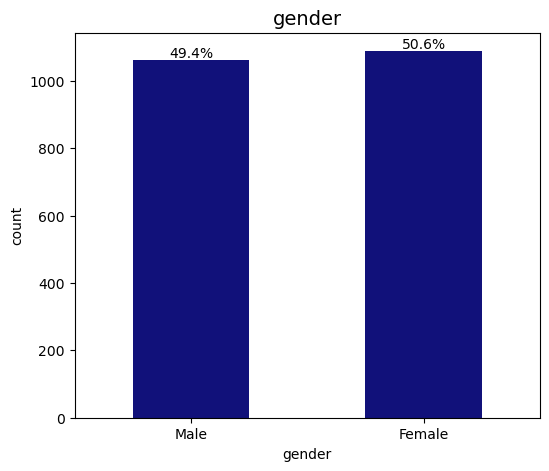

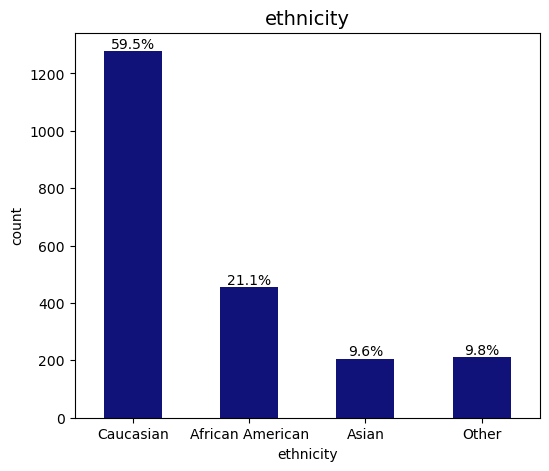

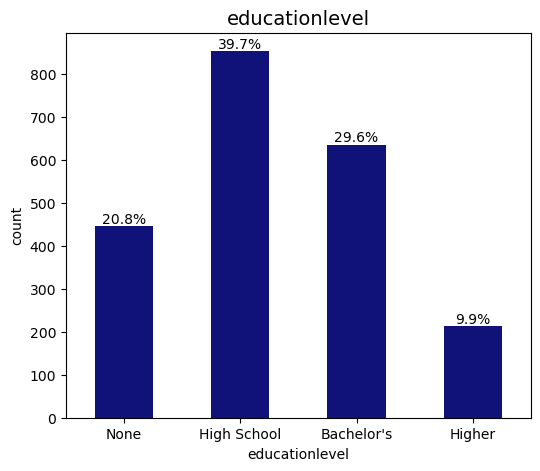

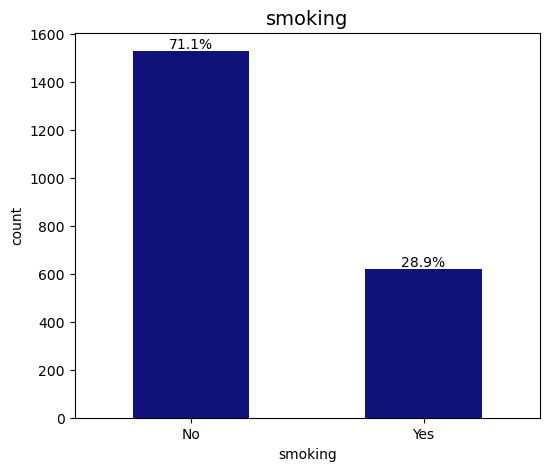

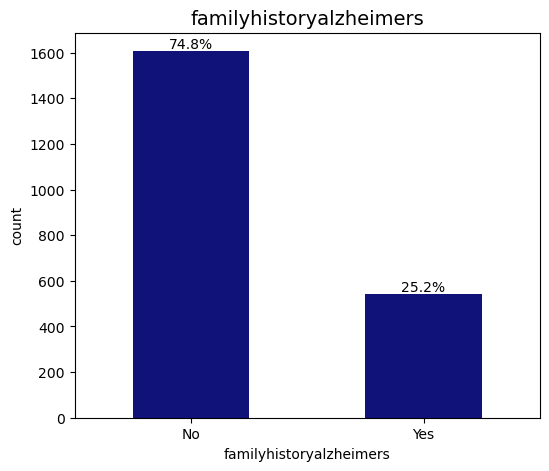

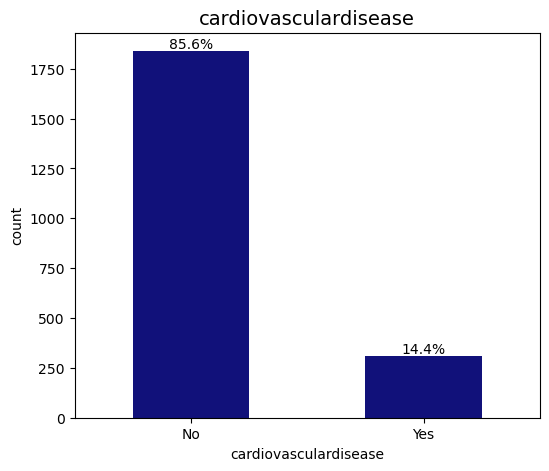

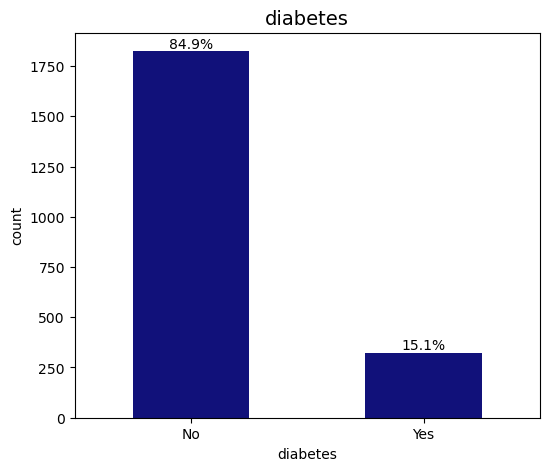

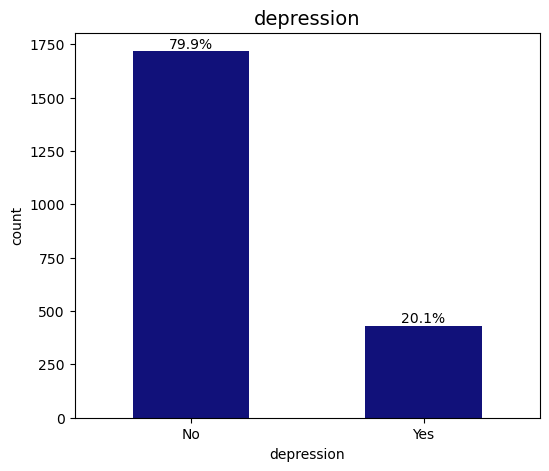

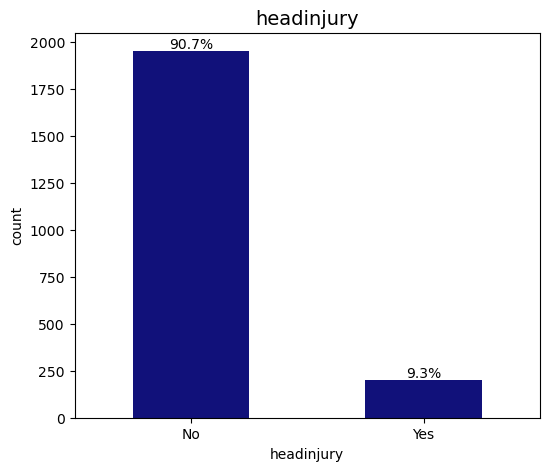

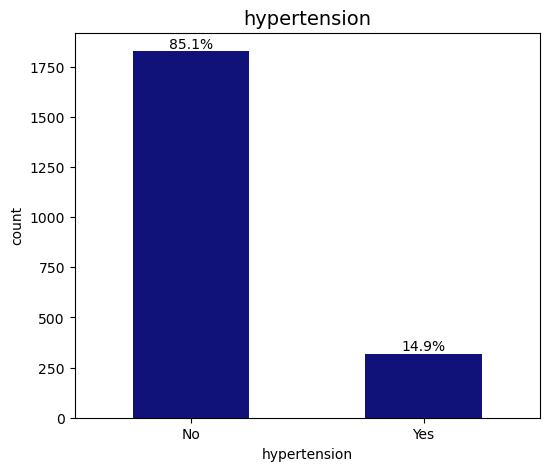

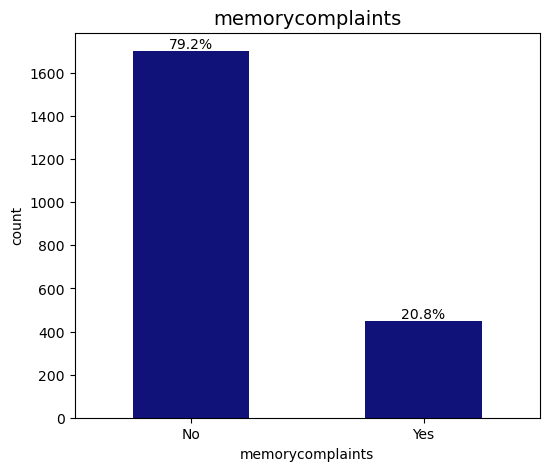

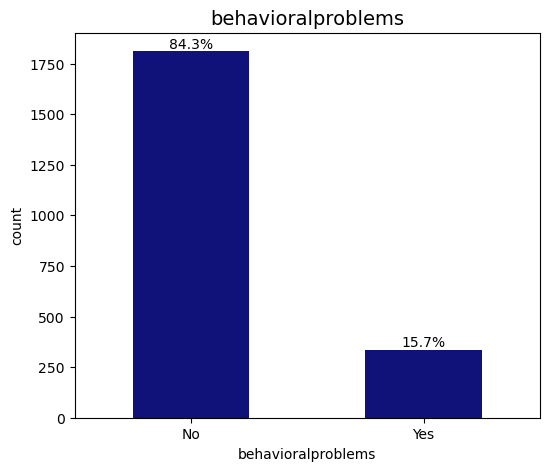

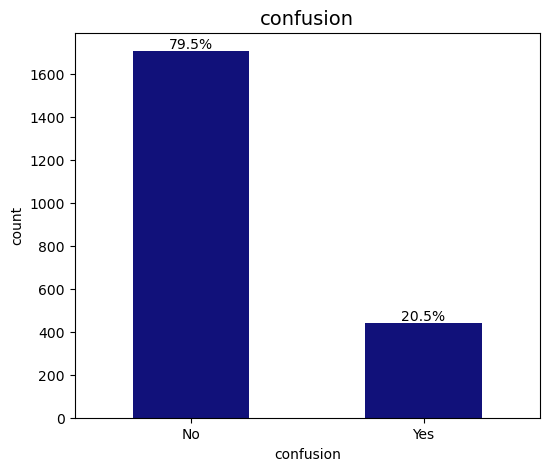

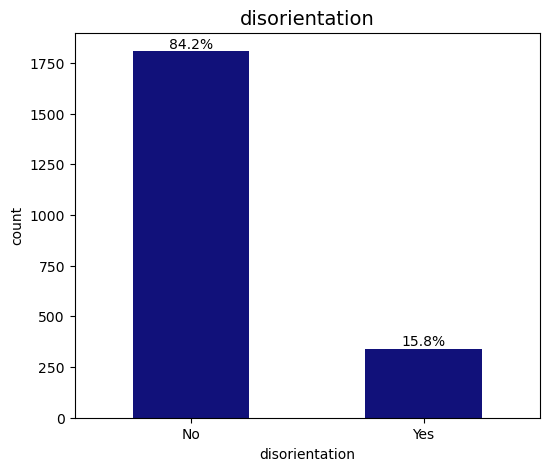

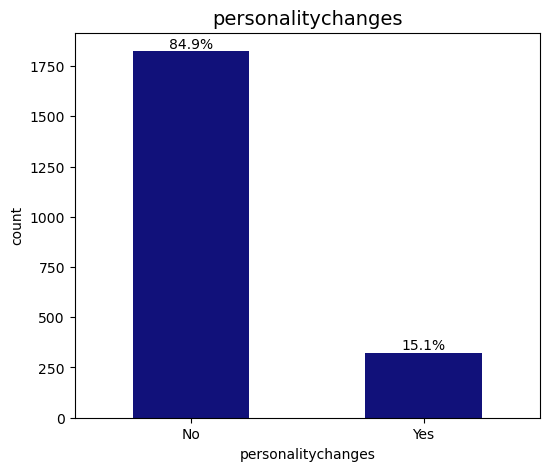

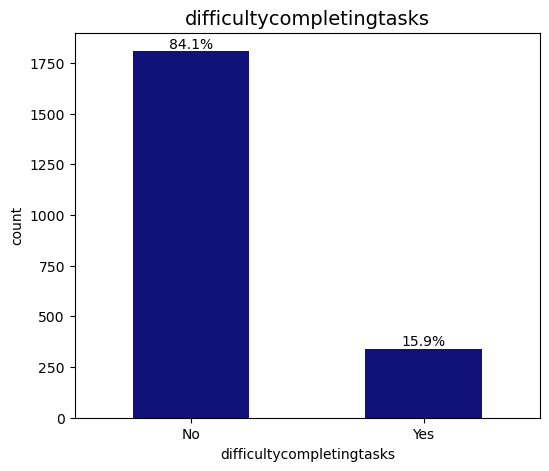

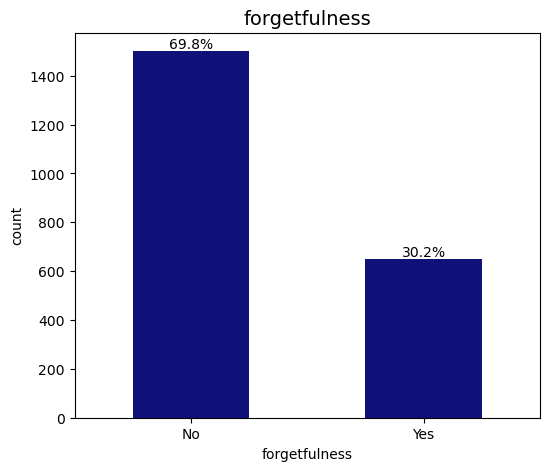

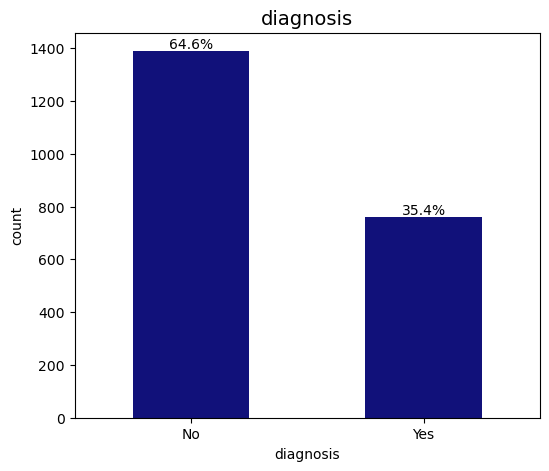

In [182]:
# Custom labels for the categorical columns
custom_labels = {
    'gender': ['Male', 'Female'],
    'ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'educationlevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'smoking': ['No', 'Yes'],
    'familyhistoryalzheimers': ['No', 'Yes'],
    'cardiovasculardisease': ['No', 'Yes'],
    'diabetes': ['No', 'Yes'],
    'depression': ['No', 'Yes'],
    'headinjury': ['No', 'Yes'],
    'hypertension': ['No', 'Yes'],
    'memorycomplaints': ['No', 'Yes'],
    'behavioralproblems': ['No', 'Yes'],
    'confusion': ['No', 'Yes'],
    'disorientation': ['No', 'Yes'],
    'personalitychanges': ['No', 'Yes'],
    'difficultycompletingtasks': ['No', 'Yes'],
    'forgetfulness': ['No', 'Yes'],
    'diagnosis': ['No', 'Yes']
}

def countplot(categorical_features):
    plt.figure(figsize=(6, 5))
    
    # Create the count plot
    ax = sns.countplot(data=data, x=categorical_features, width=0.5, color='darkblue')
    
    # Calculate and annotate percentages
    total = len(data[categorical_features])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{(count / total) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count), ha='center', va='bottom', fontsize=10, color='black')
    
    # Set title and custom labels
    plt.title(f'{categorical_features}', fontsize=14)    
    labels = custom_labels[categorical_features]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

# Generate count plots for all categorical features
for cat in categorical_features:
    countplot(cat)

### Categorical Features Distribution Summary

##### 1. Both females and males are equally represented across the dataset.
##### 2. Caucasian is the most represented ethnic demographic. Followed by African-Americans with Asian being the least represented.
##### 3. High school graduates constitute the largest educational group, closely followed by individuals with a bachelor’s degree.
##### 4. Overall, the dataset predominantly consists of individuals without disease or underlying health problems.

### 3.2 Distribution of Numerical Features

In [185]:
data[['age', 'bmi', 'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality', 
'systolicbp', 'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 
'mmse', 'functionalassessment', 'adl']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
bmi,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
alcoholconsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
physicalactivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
dietquality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
sleepquality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
systolicbp,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
diastolicbp,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
cholesteroltotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
cholesterolldl,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


Skewness of age : 0.046


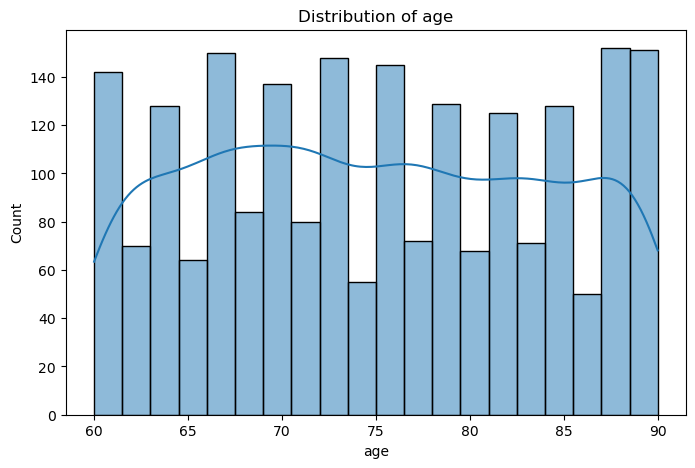

Skewness of bmi : -0.027


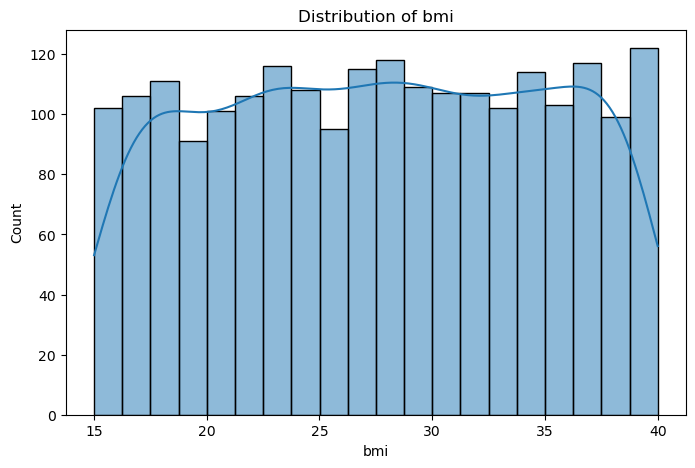

Skewness of alcoholconsumption : 0.018


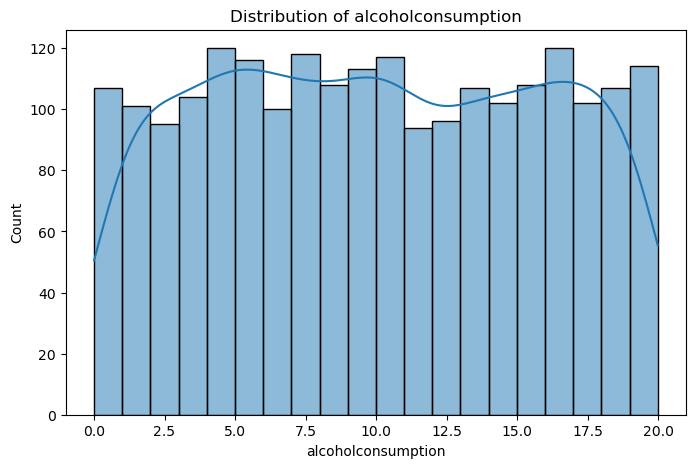

Skewness of physicalactivity : 0.045


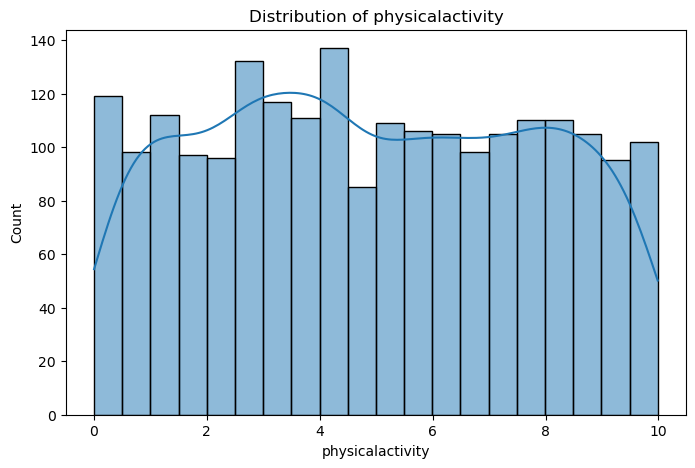

Skewness of dietquality : -0.012


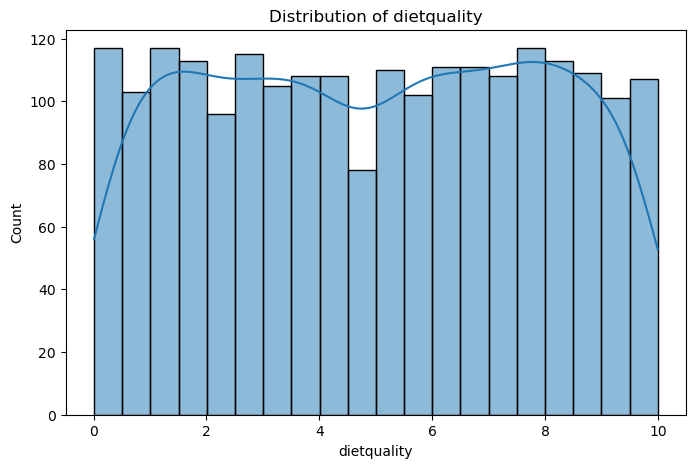

Skewness of sleepquality : -0.07


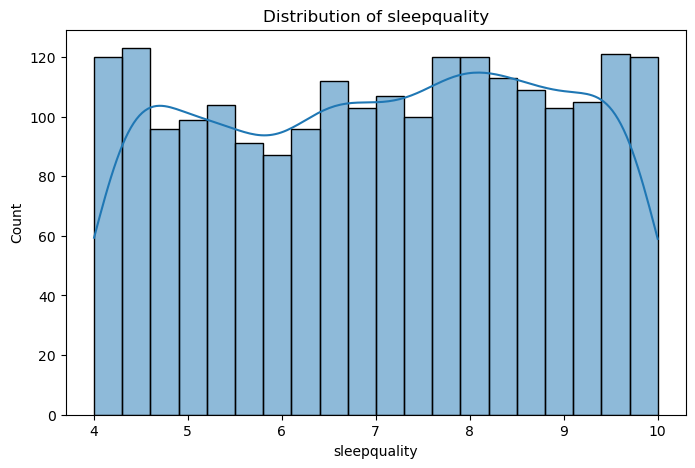

Skewness of systolicbp : 0.01


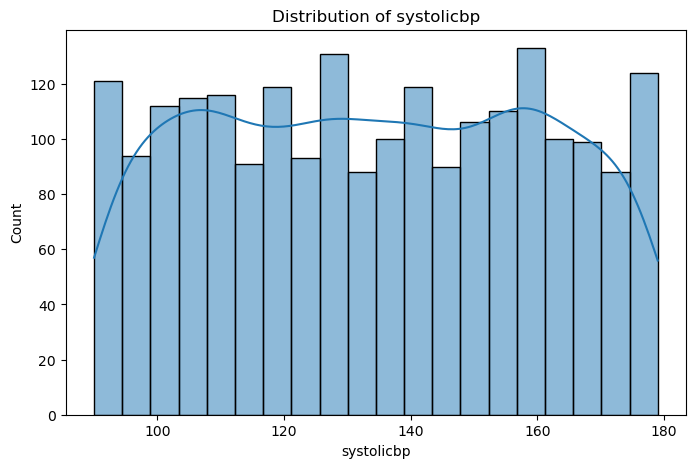

Skewness of diastolicbp : -0.054


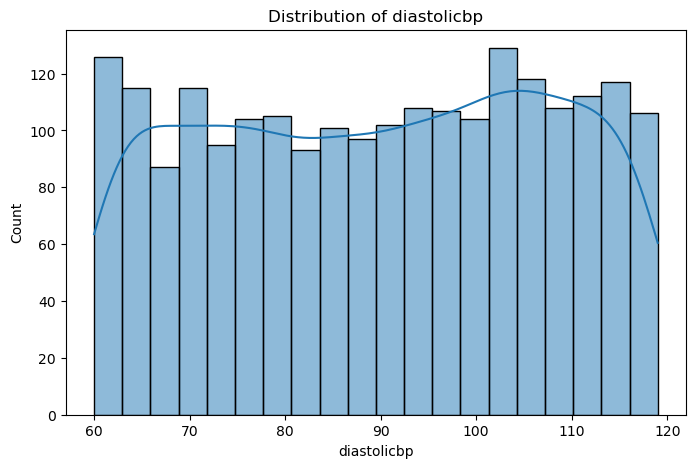

Skewness of cholesteroltotal : -0.019


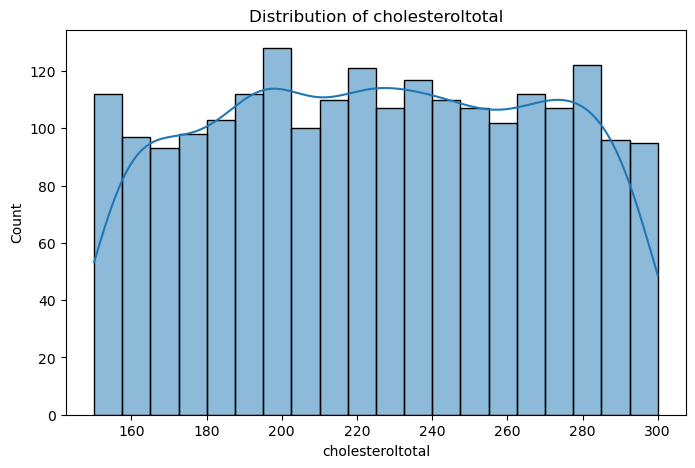

Skewness of cholesterolldl : 0.036


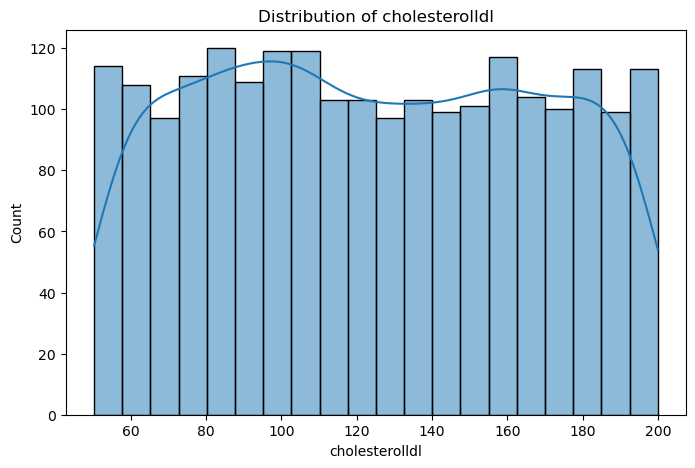

Skewness of cholesterolhdl : 0.042


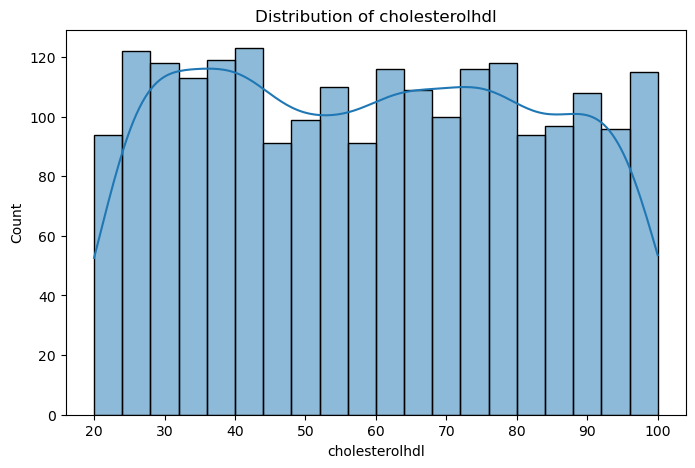

Skewness of cholesteroltriglycerides : -0.033


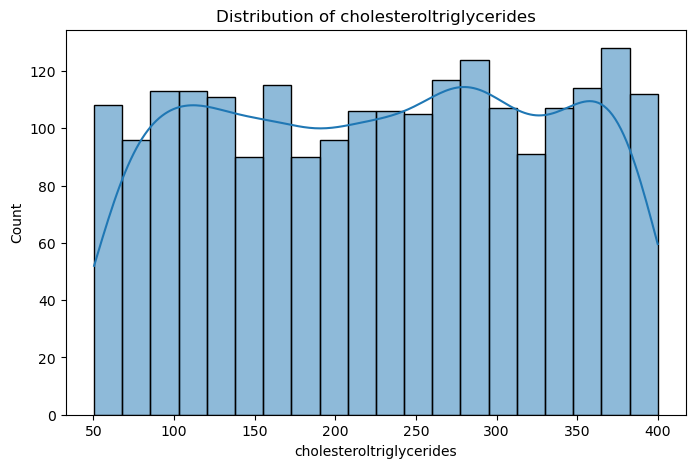

Skewness of mmse : 0.032


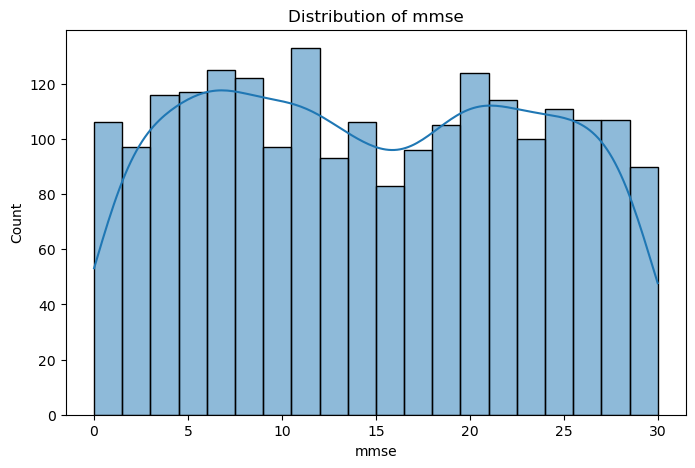

Skewness of functionalassessment : -0.035


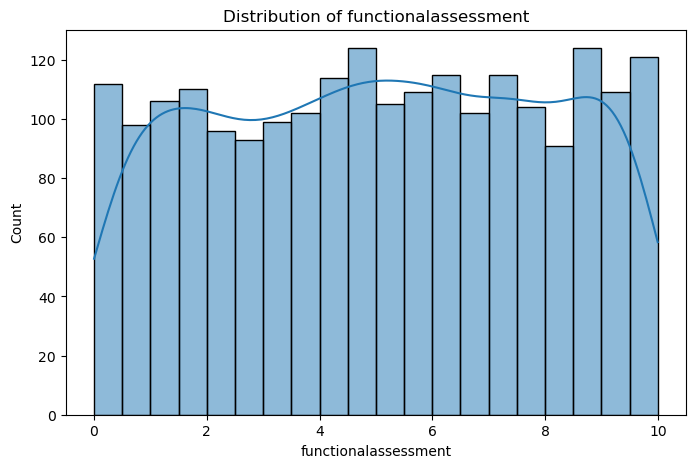

Skewness of adl : -0.03


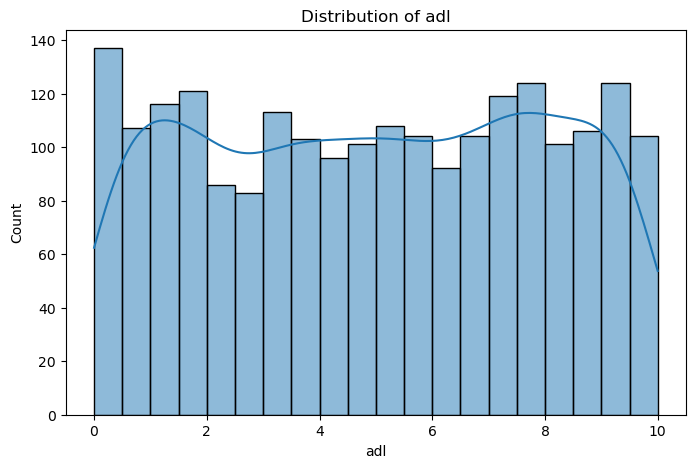

In [186]:
# Plot histogram for each numerical column
for cols in numerical_features:
    skewness = data[cols].skew(axis = 0, skipna = True).round(3)  # Calculate skewness
    print(f'Skewness of', cols, ':' , skewness)
    
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=cols, kde=True, bins=20)
    plt.title('Distribution of {}'.format(cols))
    plt.show()

#### Numerical Feature Distribution Summary

##### 1. Age ranges between 60 years and 90 years. This is consistent that the most likely group in the population who are most likely to be diagnosed with azheimer's.
##### 2. All the numerical features show a fairly uniform distribution.

### 3.3 Distribution of the Target Variable (Diagnosis)

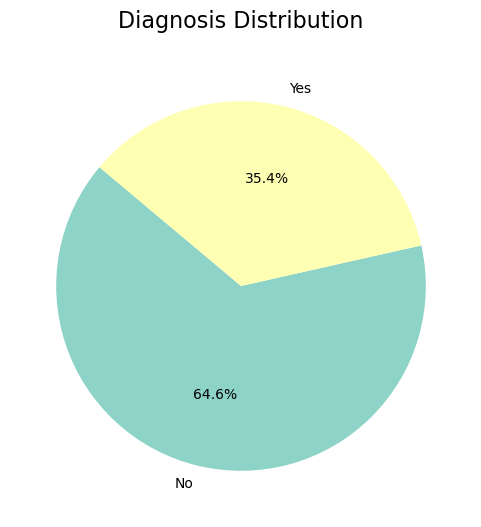

In [189]:
# Define the Response categories and count occurances
size = data['diagnosis'].value_counts()

 # Directly set custom label
diagnosis_label = {'diagnosis': ['No', 'Yes']}
labels = diagnosis_label[cat]

# Plot pie chart
plt.figure(figsize=(6, 6))
colors=sns.color_palette('Set3')
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title(label='Diagnosis Distribution', fontdict={"fontsize":16}, pad=20)
plt.show()

### Target Variable Summary

The "No" group forms the majority, indicating that a larger proportion of the dataset does not have an Alzheimer's disease diagnosis.
Approximately 35.4% (760 out of 2,149) of the individuals have been diagnosed with Alzheimer's, while around 64.6% (1,389 out of 2,149) have not.

This distribution can be helpful in understanding the prevalence of Alzheimer's within the sample population, with a greater number of individuals not having the diagnosis compared to those who do.

This confirms our previous observation in the Categorical Feature Distribution Countplots that the data is skewed heavily towards individuals without Alzheimer's Disease.

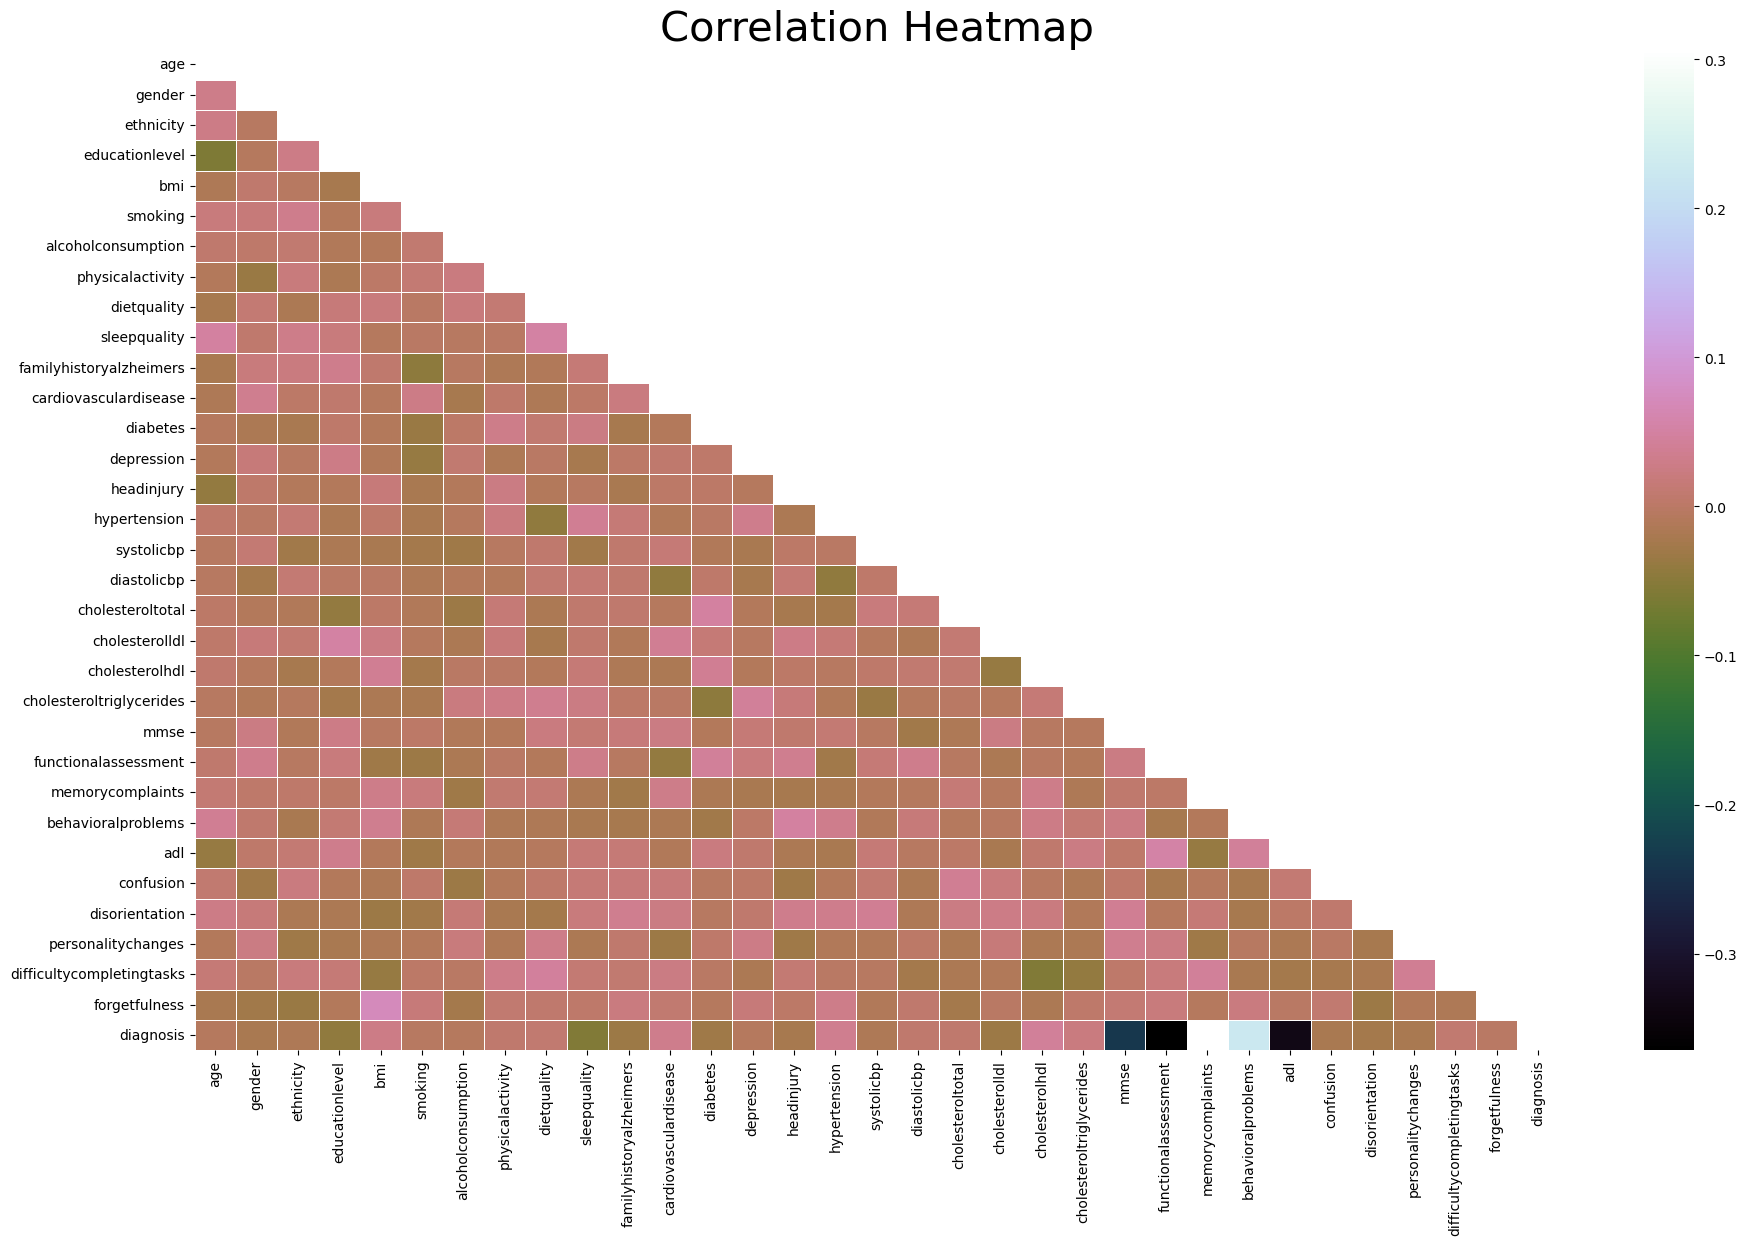

In [191]:
# Showing the correlations between the variables
correlation_matrix=data.corr().T

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Correlation matrix plot
plt.figure(figsize=(22, 13))
sns.heatmap(correlation_matrix, mask=mask, annot=False, fmt='.2f', cmap='cubehelix', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

In [192]:
# Checking correlation of features with Diagnosis
correlation_with_target = correlation_matrix['diagnosis'].sort_values(ascending=False)
print(correlation_with_target)

diagnosis                    1.000000
memorycomplaints             0.306742
behavioralproblems           0.224350
cholesterolhdl               0.042584
hypertension                 0.035080
cardiovasculardisease        0.031490
bmi                          0.026343
cholesteroltriglycerides     0.022672
difficultycompletingtasks    0.009069
dietquality                  0.008506
cholesteroltotal             0.006394
physicalactivity             0.005945
diastolicbp                  0.005293
forgetfulness               -0.000354
smoking                     -0.004865
age                         -0.005488
depression                  -0.005893
alcoholconsumption          -0.007618
ethnicity                   -0.014782
systolicbp                  -0.015615
confusion                   -0.019186
personalitychanges          -0.020627
gender                      -0.020975
headinjury                  -0.021411
disorientation              -0.024648
diabetes                    -0.031508
cholesteroll

#### Correlation Analysis Summary:

##### 1.	Strong Correlations:
Memory Complaints (0.306742) and Behavioral Problems (0.224350) have the strong positive correlation with Diagnosis. This is consist with patients with having memory complaints and Behavioral Problem have a higher chance of being diagnosed with Alzheimer's Disease.
 
Functional Assessment (-0.364898), ADL (Activities of Daily Living, -0.332346), and MMSE ( -0.237126) shows strong negative correlations with Diagnosis.
	
##### 2.	Weak Correlations:
Most lifestyle and health factors like BMI, AlcoholConsumption and Smoking) exhibit weak correlations with Diagnosis.
Also, some medical history features like Hypertension and Diabetes show low correlation, suggesting less direct association.

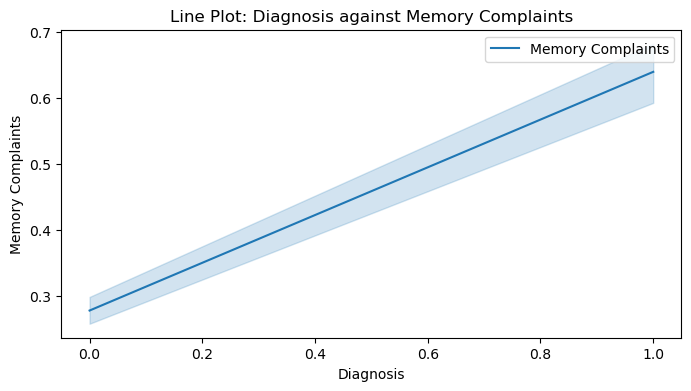

In [194]:
#Create a line plot for 'diagnosis' against Memory Complaint
plt.figure(figsize=(8, 4))

sns.lineplot(x='memorycomplaints', y='diagnosis', data=data, label='Memory Complaints')

plt.title('Line Plot: Diagnosis against Memory Complaints')
plt.xlabel('Diagnosis')
plt.ylabel('Memory Complaints')

plt.show()

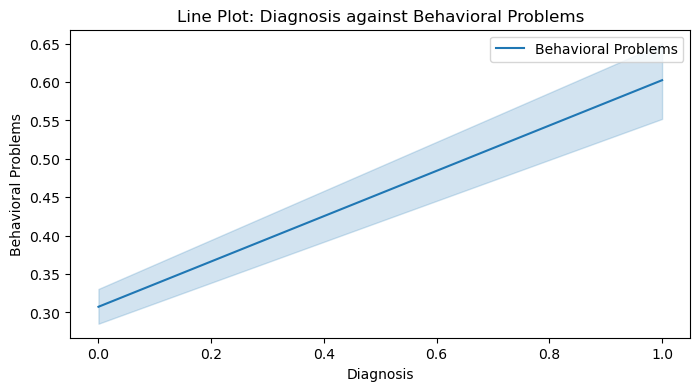

In [195]:
#Create a line plot for 'diagnosis' against Behavioral Problems
plt.figure(figsize=(8, 4))

sns.lineplot(x='behavioralproblems', y='diagnosis', data=data, label='Behavioral Problems')

plt.title('Line Plot: Diagnosis against Behavioral Problems')
plt.xlabel('Diagnosis')
plt.ylabel('Behavioral Problems')

plt.show()

<Figure size 800x400 with 0 Axes>

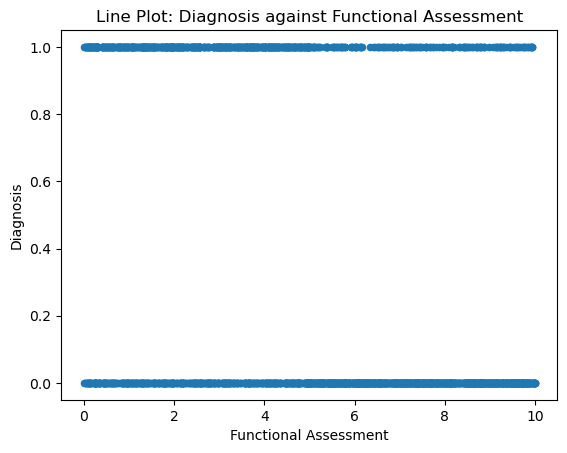

In [196]:
#Create a line plot for 'diagnosis' against other variables
plt.figure(figsize=(8, 4))

data.plot(x='functionalassessment', y='diagnosis', kind='scatter')

plt.title('Line Plot: Diagnosis against Functional Assessment')
plt.xlabel('Functional Assessment')
plt.ylabel('Diagnosis')

plt.show()

## 4. Modelling

In [198]:
cols = []

for c in data.columns:
    cols = cols + [c]

cols_to_remove = ['age', 'ethnicity', 'educationlevel', 'bmi', 'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality', 
'systolicbp', 'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 
'mmse', 'functionalassessment', 'adl']

for c in cols_to_remove:
    cols.remove(c)

cols

['gender',
 'smoking',
 'familyhistoryalzheimers',
 'cardiovasculardisease',
 'diabetes',
 'depression',
 'headinjury',
 'hypertension',
 'memorycomplaints',
 'behavioralproblems',
 'confusion',
 'disorientation',
 'personalitychanges',
 'difficultycompletingtasks',
 'forgetfulness',
 'diagnosis']

In [199]:
data_alt = pd.get_dummies(data, columns=cols, drop_first=True, dtype=int)

In [200]:
data_alt

,age,ethnicity,educationlevel,bmi,alcoholconsumption,physicalactivity,dietquality,sleepquality,systolicbp,diastolicbp,...,headinjury_1,hypertension_1,memorycomplaints_1,behavioralproblems_1,confusion_1,disorientation_1,personalitychanges_1,difficultycompletingtasks_1,forgetfulness_1,diagnosis_1
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,...,0,0,0,0,0,0,0,1,0,0
4752,89,0,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,...,0,0,0,0,0,0,0,0,1,0
4753,73,3,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,...,0,0,0,0,0,1,0,1,0,0
4754,74,0,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,...,0,0,0,1,0,0,0,0,0,0
4755,89,0,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,61,0,1,39.121757,1.561126,4.049964,6.555306,7.535540,122,101,...,0,0,0,0,1,0,0,0,0,1
6896,75,0,2,17.857903,18.767261,1.360667,2.904662,8.555256,152,106,...,0,0,0,1,0,0,0,0,0,1
6897,77,0,1,15.476479,4.594670,9.886002,8.120025,5.769464,115,118,...,0,0,0,0,0,0,0,0,0,1


In [201]:
data_alt.columns

Index(['age', 'ethnicity', 'educationlevel', 'bmi', 'alcoholconsumption',
       'physicalactivity', 'dietquality', 'sleepquality', 'systolicbp',
       'diastolicbp', 'cholesteroltotal', 'cholesterolldl', 'cholesterolhdl',
       'cholesteroltriglycerides', 'mmse', 'functionalassessment', 'adl',
       'gender_1', 'smoking_1', 'familyhistoryalzheimers_1',
       'cardiovasculardisease_1', 'diabetes_1', 'depression_1', 'headinjury_1',
       'hypertension_1', 'memorycomplaints_1', 'behavioralproblems_1',
       'confusion_1', 'disorientation_1', 'personalitychanges_1',
       'difficultycompletingtasks_1', 'forgetfulness_1', 'diagnosis_1'],
      dtype='object')

In [202]:
data_alt.rename(columns={'gender_1':'Male', 'smoking_1':'smoking_dummy', 'familyhistoryalzheimers_1':'familyhistoryalzheimers_dummy',
       'cardiovasculardisease_1':'cardiovasculardisease_dummy', 'diabetes_1':'diabetes_dummy', 'depression_1':'depression_dummy',
       'headinjury_1':'headinjury_dummy', 'hypertension_1':'hypertension_dummy', 'memorycomplaints_1':'memorycomplaints_dummy',
       'behavioralproblems_1':'behavioralproblems_dummy', 'confusion_1':'confusion_dummy', 'disorientation_1':'disorientation_dummy', 
       'personalitychanges_1':'personalitychanges_dummy', 'difficultycompletingtasks_1':'difficultycompletingtasks_dummy', 
        'forgetfulness_1':'forgetfulness_dummy', 'diagnosis_1':'diagnosis'}, inplace=True)

In [203]:
data_alt

,age,ethnicity,educationlevel,bmi,alcoholconsumption,physicalactivity,dietquality,sleepquality,systolicbp,diastolicbp,...,headinjury_dummy,hypertension_dummy,memorycomplaints_dummy,behavioralproblems_dummy,confusion_dummy,disorientation_dummy,personalitychanges_dummy,difficultycompletingtasks_dummy,forgetfulness_dummy,diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,...,0,0,0,0,0,0,0,1,0,0
4752,89,0,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,...,0,0,0,0,0,0,0,0,1,0
4753,73,3,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,...,0,0,0,0,0,1,0,1,0,0
4754,74,0,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,...,0,0,0,1,0,0,0,0,0,0
4755,89,0,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,61,0,1,39.121757,1.561126,4.049964,6.555306,7.535540,122,101,...,0,0,0,0,1,0,0,0,0,1
6896,75,0,2,17.857903,18.767261,1.360667,2.904662,8.555256,152,106,...,0,0,0,1,0,0,0,0,0,1
6897,77,0,1,15.476479,4.594670,9.886002,8.120025,5.769464,115,118,...,0,0,0,0,0,0,0,0,0,1


In [204]:
# Splitting Dependent and Independent Variables
x = data_alt.drop(columns=['diagnosis']) # Exclude target
y = data_alt['diagnosis']

#### 4.1 Logistic Regression

In [206]:
# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x.values)

In [207]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [208]:
vars = [x_train, x_test, y_train, y_test]
for i in vars:
    print(i.shape)

(1719, 32)
(430, 32)
(1719,)
(430,)


In [209]:
#use maximum likelihood for logistics regression
logit = LogisticRegression(max_iter=10000)

In [210]:
logit.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [211]:
# Predictions
y_pred_logit = logit.predict(x_test)

In [212]:
# Evaluate the model's performance
accuracy_logit = accuracy_score(y_test, y_pred_logit)
confusion_mat_logit = confusion_matrix(y_test, y_pred_logit)
classification_report_logit = classification_report(y_test, y_pred_logit)

# Print the results
print("Accuracy:", accuracy_logit)
print("Confusion Matrix:\n", confusion_mat_logit)
print("Classification Report:\n", classification_report_logit)

Accuracy: 0.8302325581395349
Confusion Matrix:
 [[248  29]
 [ 44 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



<Figure size 1000x1000 with 0 Axes>

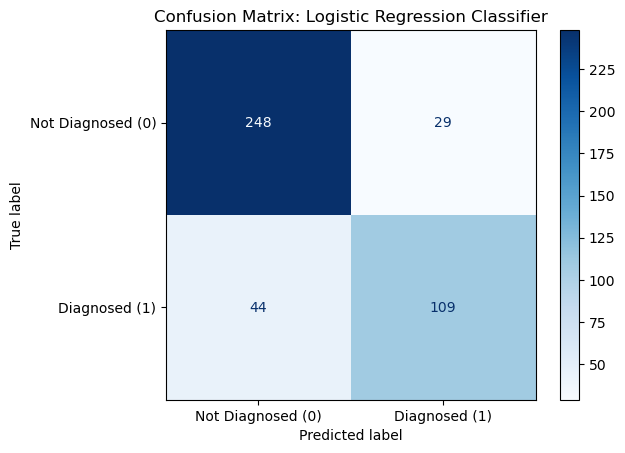

In [213]:
display_logit = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_logit, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_logit.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Logistic Regression Classifier')
plt.show()

#### Logistic Regression Grid Search

In [215]:
# Define the parameter grid for KNeighborsClassifier
param_grid_logit = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization)
    'solver': ['liblinear', 'saga'],  # Algorithms for optimization  
    'max_iter': [100, 200, 500]    # Maximum number of iterations allowed for convergence
}

# Initialize the grid search with cross-validation
grid_search_logit = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_grid_logit, cv=5, verbose=0, n_jobs=-1)

# Fit the grid search on the training data
grid_search_logit.fit(x_train, y_train)

# Retrieve the best parameters and the best estimator
best_params_logit = grid_search_logit.best_params_
best_estimator_logit = grid_search_logit.best_estimator_

# Predict on the test set using the best estimator
y_pred_best_logit = best_estimator_logit.predict(x_test)

# Evaluate the model's performance
accuracy_best_logit = accuracy_score(y_test, y_pred_best_logit)
confusion_mat_best_logit = confusion_matrix(y_test, y_pred_best_logit)
classification_rep_best_logit = classification_report(y_test, y_pred_best_logit)

# Print the results
print("Best Parameters:", best_params_logit)
print("Accuracy:", accuracy_best_logit)
print("Confusion Matrix:\n", confusion_mat_best_logit)
print("Classification Report:\n", classification_rep_best_logit)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.8302325581395349
Confusion Matrix:
 [[248  29]
 [ 44 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



<Figure size 1000x1000 with 0 Axes>

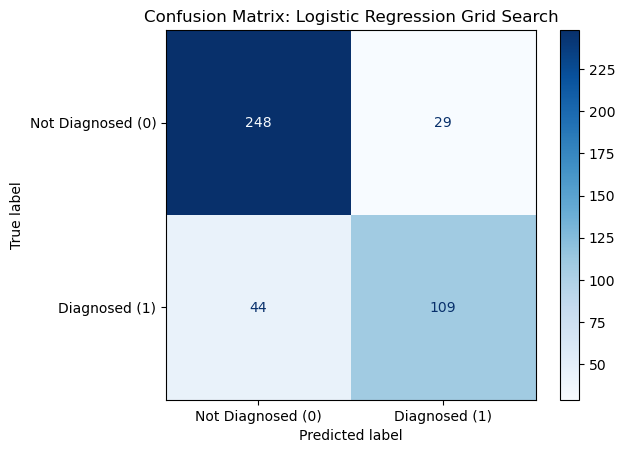

In [216]:
display_logit_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_logit, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_logit_grid.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Logistic Regression Grid Search')
plt.show()

#### 4.2. K-Nearest Neighbor

In [218]:
knn = KNeighborsClassifier(n_neighbors=3)

In [219]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [220]:
# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Print the results
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", confusion_mat_knn)
print("Classification Report:\n", classification_report_knn)

Accuracy: 0.6837209302325581
Confusion Matrix:
 [[226  51]
 [ 85  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       277
           1       0.57      0.44      0.50       153

    accuracy                           0.68       430
   macro avg       0.65      0.63      0.63       430
weighted avg       0.67      0.68      0.67       430



<Figure size 1000x1000 with 0 Axes>

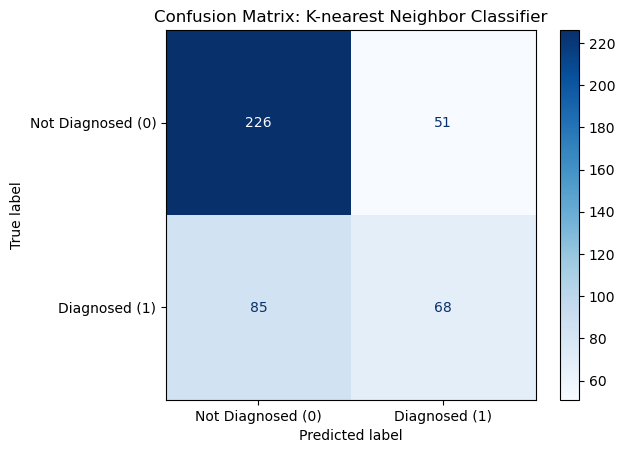

In [221]:
display_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_knn, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_knn.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: K-nearest Neighbor Classifier')
plt.show()

#### K-Nearest Neighbor Grid Search

In [223]:
# Define the parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [1, 5, 10, 20, 30],  # Leaf size for BallTree and KDTree
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Initialize the grid search with cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=0, n_jobs=-1)

# Fit the grid search on the training data
grid_search_knn.fit(x_train, y_train)

# Retrieve the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

# Predict on the test set using the best estimator
y_pred_best_knn = best_estimator_knn.predict(x_test)

# Evaluate the model's performance
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
confusion_mat_best_knn = confusion_matrix(y_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# Print the results
print("Best Parameters:", best_params_knn)
print("Accuracy:", accuracy_best_knn)
print("Confusion Matrix:\n", confusion_mat_best_knn)
print("Classification Report:\n", classification_rep_best_knn)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Accuracy: 0.7209302325581395
Confusion Matrix:
 [[247  30]
 [ 90  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       277
           1       0.68      0.41      0.51       153

    accuracy                           0.72       430
   macro avg       0.71      0.65      0.66       430
weighted avg       0.71      0.72      0.70       430



<Figure size 1000x1000 with 0 Axes>

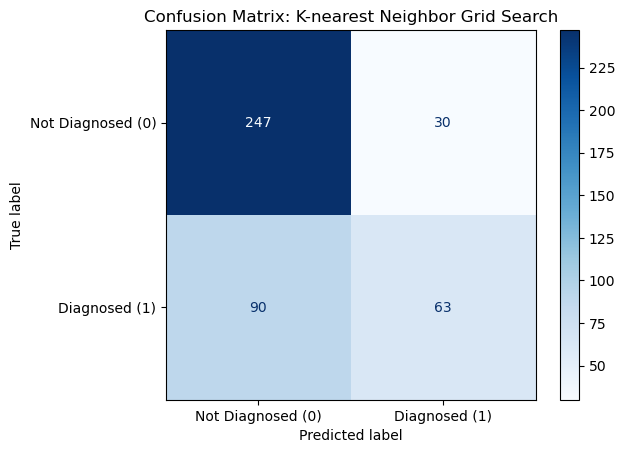

In [224]:
display_knn_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_knn, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_knn_grid.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: K-nearest Neighbor Grid Search')
plt.show()

#### 4.3. Decision Tree

In [226]:
dt = DecisionTreeClassifier(random_state=42)

In [227]:
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [228]:
# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", confusion_mat_dt)
print("Classification Report:\n", classification_report_dt)

Accuracy: 0.8930232558139535
Confusion Matrix:
 [[255  22]
 [ 24 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       277
           1       0.85      0.84      0.85       153

    accuracy                           0.89       430
   macro avg       0.88      0.88      0.88       430
weighted avg       0.89      0.89      0.89       430



<Figure size 1000x1000 with 0 Axes>

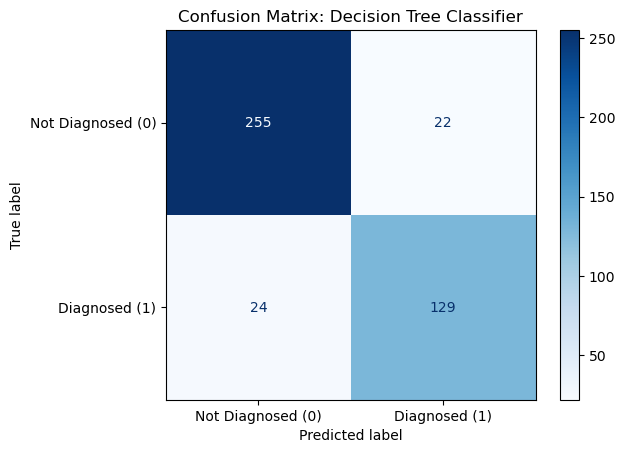

In [229]:
display_dt = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_dt, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_dt.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.show()

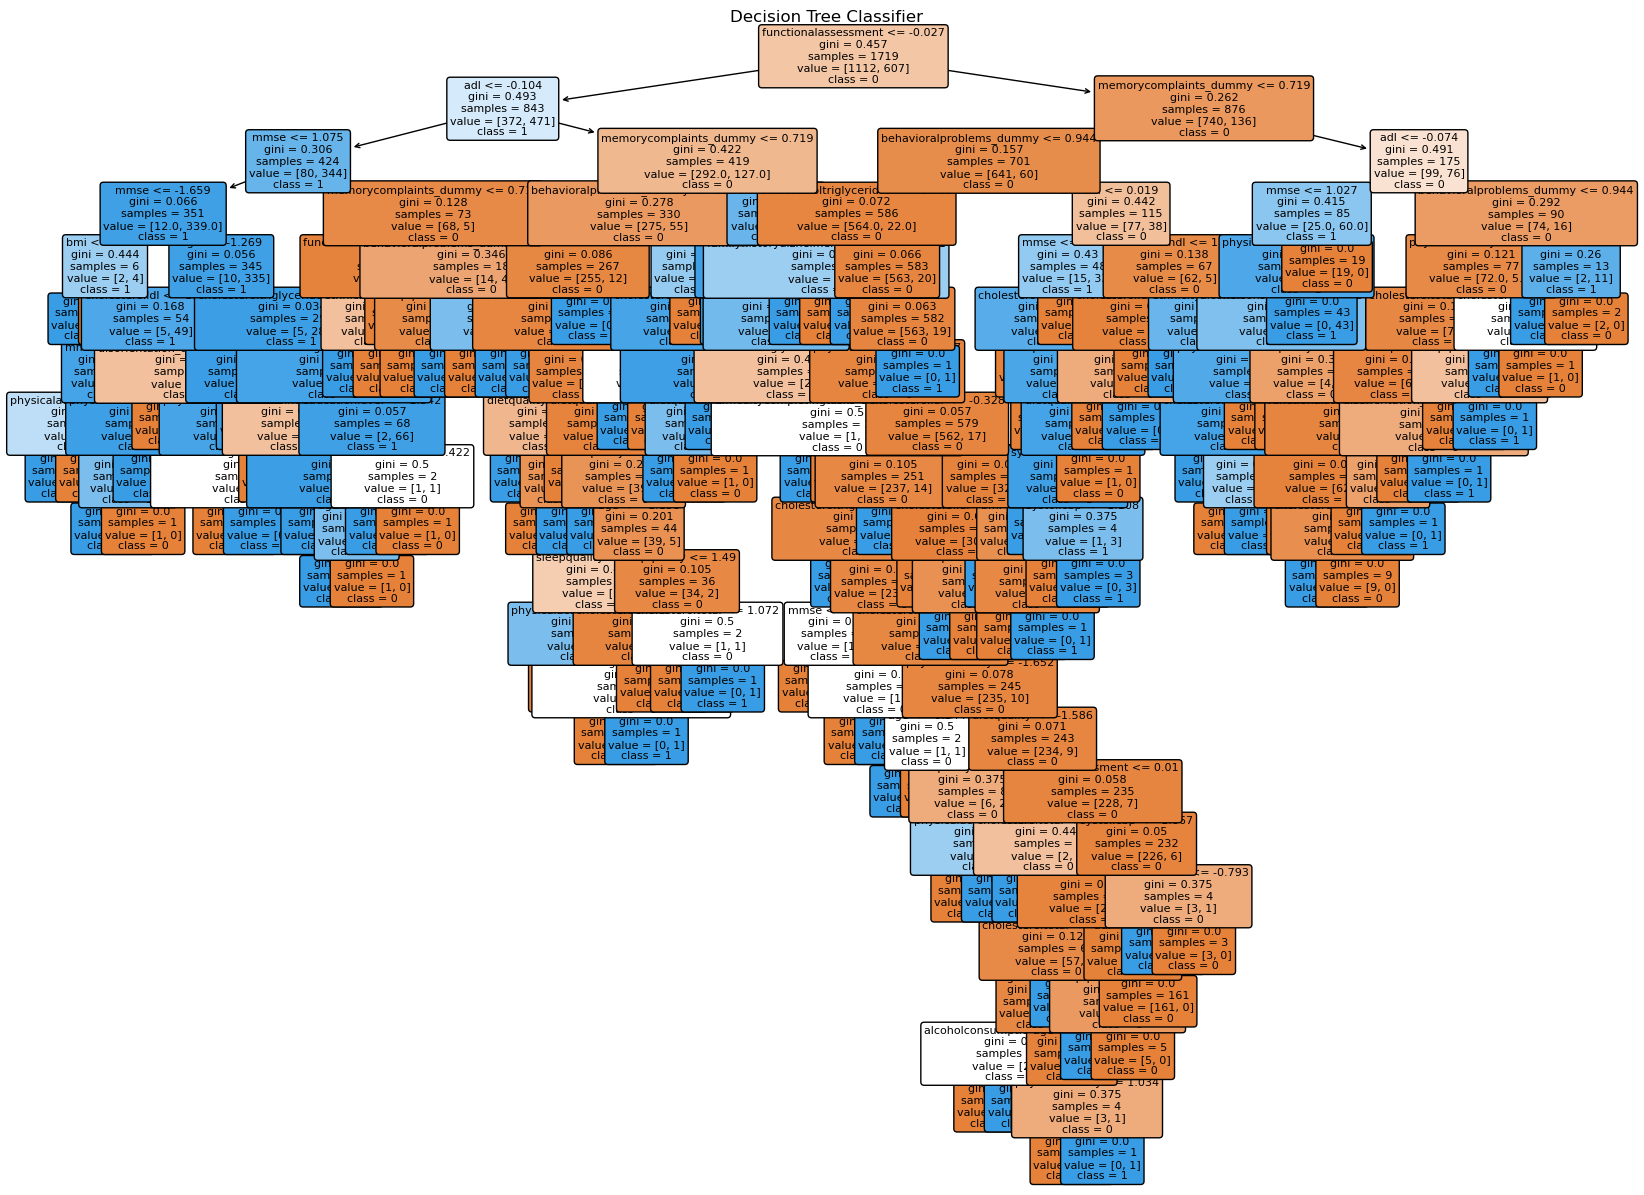

In [230]:
x = x = data_alt.drop(columns=['diagnosis'], axis=1)
cols = list(x)

#Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(dt, feature_names=cols, class_names= ('0','1'), filled=True, rounded=True, fontsize=8)
plt.title('Decision Tree Classifier')
plt.show()

#### Decision Tree Grid Search

In [232]:
# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required to be at a leaf node
}

# Initialize the grid search with cross-validation
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, verbose=0, n_jobs=-1)

# Fit the grid search on the training data
grid_search_dt.fit(x_train, y_train)

# Retrieve the best parameters and the best estimator
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_

# Predict on the test set using the best estimator
y_pred_best_dt = best_estimator_dt.predict(x_test)

# Evaluate the model's performance
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
confusion_mat_best_dt = confusion_matrix(y_test, y_pred_best_dt)
classification_rep_best_dt = classification_report(y_test, y_pred_best_dt)

# Print the results
print("Best Parameters:", best_params_dt)
print("Accuracy:", accuracy_best_dt)
print("Confusion Matrix:\n", confusion_mat_best_dt)
print("Classification Report:\n", classification_rep_best_dt)

Best Parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.9325581395348838
Confusion Matrix:
 [[266  11]
 [ 18 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       277
           1       0.92      0.88      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.93       430
weighted avg       0.93      0.93      0.93       430



<Figure size 1000x1000 with 0 Axes>

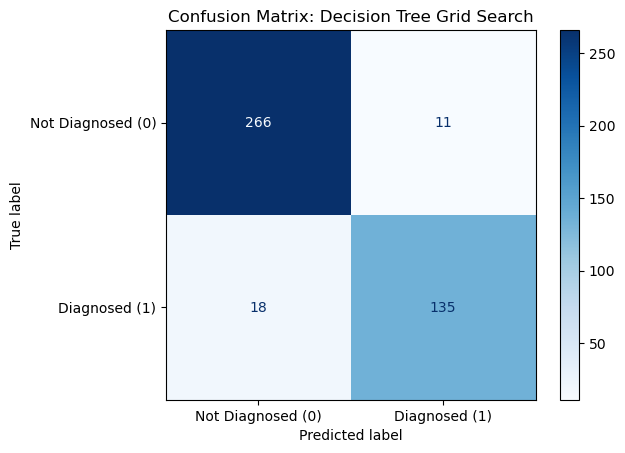

In [233]:
display_dt_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_dt, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_dt_grid.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Decision Tree Grid Search')
plt.show()

#### 4.4. Random Forest

In [235]:
rf = RandomForestClassifier(random_state=42)

In [236]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [237]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_mat_rf)
print("Classification Report:\n", classification_report_rf)

Accuracy: 0.9348837209302325
Confusion Matrix:
 [[272   5]
 [ 23 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.85      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430



<Figure size 1000x1000 with 0 Axes>

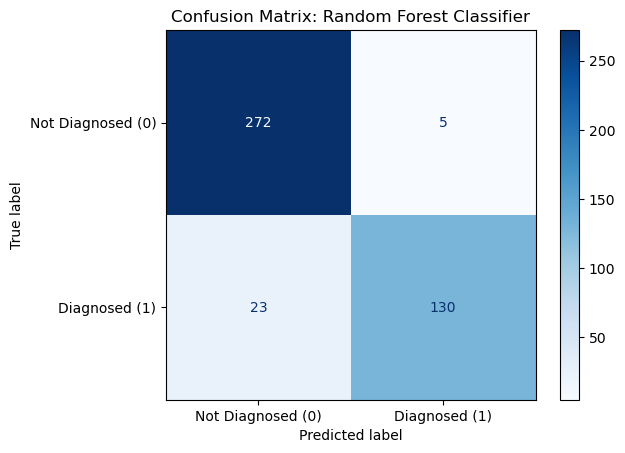

In [238]:
display_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_rf, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_rf.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

#### Random Forest Grid Search

In [240]:
#Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]
}

# Initialize the grid search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, verbose=0, n_jobs=-1)

# Fit the grid search on the training data
grid_search_rf.fit(x_train, y_train)

# Retrieve the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# Predict on the test set using the best estimator
y_pred_best_rf = best_estimator_rf.predict(x_test)

# Evaluate the model's performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
confusion_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the results
print("Best Parameters:", best_params_rf)
print("Accuracy:", accuracy_best_rf)
print("Confusion Matrix:\n", confusion_mat_best_rf)
print("Classification Report:\n", classification_rep_best_rf)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9418604651162791
Confusion Matrix:
 [[272   5]
 [ 20 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.96      0.87      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



<Figure size 1000x1000 with 0 Axes>

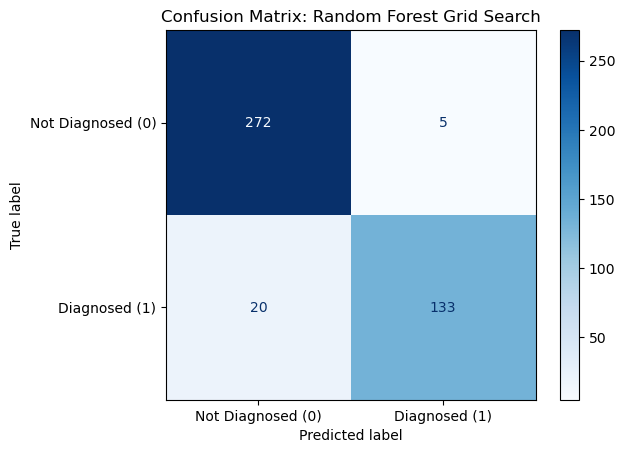

In [241]:
display_rf_grid = ConfusionMatrixDisplay(confusion_matrix = confusion_mat_best_rf, display_labels=['Not Diagnosed (0)', 'Diagnosed (1)'])

plt.figure(figsize=(10,10))

display_rf_grid.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix: Random Forest Grid Search')
plt.show()